In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
from collections import Counter

In [4]:
notes_file = '../data/notes-00000.tsv'
ratings_file = '../data/ratings-00000.tsv'
hydrated_file = '../data/idtweetVALUES.jsonl'

In [5]:
notes_df = pd.read_csv(notes_file, delimiter='\t')

In [6]:
ratings_df = pd.read_csv(ratings_file, delimiter='\t')
deprecated_cols= ['helpful',
                  'notHelpful',
                  'helpfulInformative',
                  'helpfulEmpathetic',
                  'helpfulUniqueContext',
                  'notHelpfulOpinionSpeculationOrBias',
                  'notHelpfulOutdated',
                  'notHelpfulOffTopic']
ratings_df = ratings_df.drop(deprecated_cols,axis=1)


In [7]:
cat_columns = ['classification', 'believable', 'harmful', 'validationDifficulty',
       'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources']
#cat_columns = ['classification']

In [8]:
#odd number of votes > 1
agg_notes_df = notes_df.groupby('tweetId')\
                       .agg({'noteId':'count'})

In [9]:
MoreThanOneTweets=list(agg_notes_df[ (agg_notes_df['noteId']>1)].index)

In [10]:
print(len(MoreThanOneTweets)/len(notes_df)*100)

13.143412107478147


In [114]:
# group by tweetId and count notes
# takes notes with count ==2
# for the tweets count % of conflict

In [11]:
agg=notes_df.groupby('tweetId').count()

In [12]:
TweetsTwoNotes=list(agg[agg.noteId==2].index)

In [15]:
conflict_tweets=[]
for t in TweetsTwoNotes:
    if len(set(notes_df[notes_df.tweetId==t]['classification']))==2:
        conflict_tweets.append(t)

In [16]:
len(conflict_tweets)

372

In [17]:
BW_topics = pd.read_csv('../data/BW_tweets_all_Topic.csv')

In [18]:
pd.merge(pd.DataFrame(conflict_tweets,columns=['tweetId']),BW_topics,how='left',on='tweetId')['Topic'].value_counts()

Outlier         169
Politics         55
Health           43
Society          31
Social Media     10
Country           9
Guns              8
Nature            8
Economy           4
Sports            2
Technology        2
Music             1
Characters        1
Birdwatch         1
Food              1
Name: Topic, dtype: int64

classification 2 {'MISINFORMED_OR_POTENTIALLY_MISLEADING': 0, 'NOT_MISLEADING': 1}


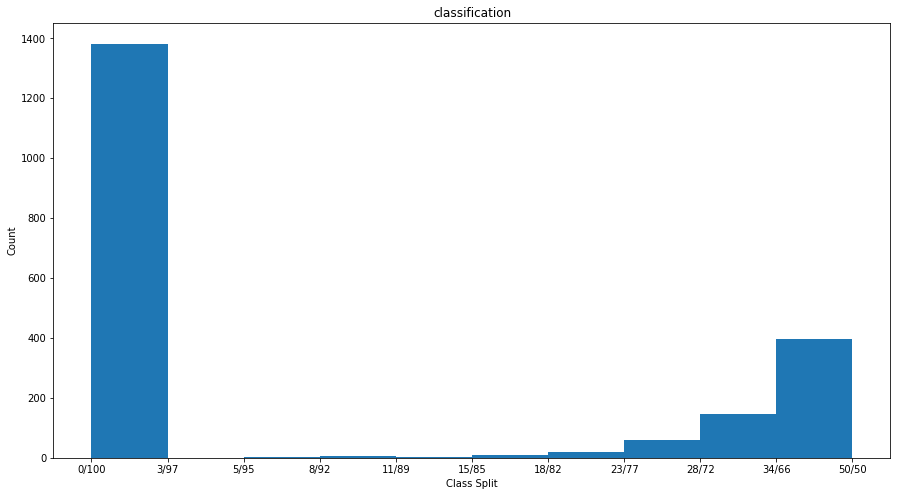

In [19]:
cat_columns=['classification']

for categorical_column in cat_columns:
    fil_df=notes_df[categorical_column].dropna()
    label2code = dict(zip(fil_df,pd.factorize(fil_df)[0]))
    print(categorical_column,len(label2code), label2code)
    all_vars=[]
    ratios=[]
    N=[]
    for t in MoreThanOneTweets:
        cat_notes=list(notes_df[notes_df.tweetId==t][categorical_column].dropna())
        if cat_notes:
            encoded_cat_notes=[label2code[x] for x in cat_notes]
            all_vars.append(np.var(encoded_cat_notes))
            ratios.append(f'{len([x for x in encoded_cat_notes if x==1])}/{len(encoded_cat_notes)}')
            N.append(len(encoded_cat_notes))

    
    

    fig = plt.figure(figsize=(15,8))
    plt.xlabel('Class Split')
    plt.ylabel('Count')
    plt.title(categorical_column)

    t=plt.hist(all_vars)
    xticks=[f'{int(np.round(np.roots([1,-1,xx])[1]*100))}/{int(100-np.round(np.roots([1,-1,xx])[1]*100))}' for xx in t[1]]
    plt.xticks(ticks=t[1],labels=xticks)
    plt.show()
    #plt.legend()
    plt.show()


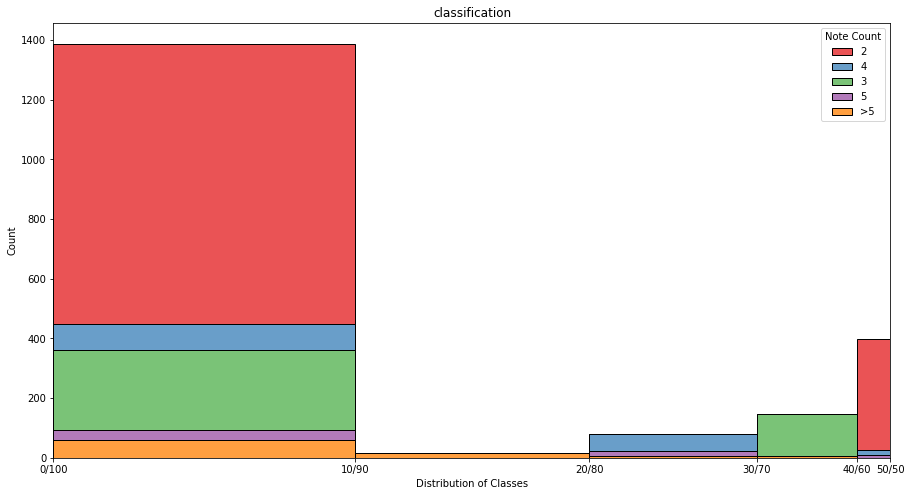

In [20]:
def set_hue(x):
    if x ==2: return '2'
    if x==3: return '3'
    if x==4: return '4'
    if x==5: return '5'
    if x>5: return '>5'

hues=[set_hue(x) for x in N]

hues=[set_hue(x) for x in N]

var_df=pd.DataFrame({'Variances':all_vars,'Note Count':hues})

bins=[0,0.09,0.16,0.21,0.24,0.25]

fig = plt.figure(figsize=(15,8))
plt.xlim((0,0.25))
ax=sns.histplot(data=var_df, x='Variances', bins=bins,
                hue='Note Count',palette=sns.color_palette("Set1",n_colors=5),multiple='stack')
xticks = bins
xticks_labels=[f'{int(np.round(np.roots([1,-1,xx])[1]*100))}/{int(100-np.round(np.roots([1,-1,xx])[1]*100))}' for xx in xticks ]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels)
plt.xlabel('Distribution of Classes')
plt.title(categorical_column)
plt.show()

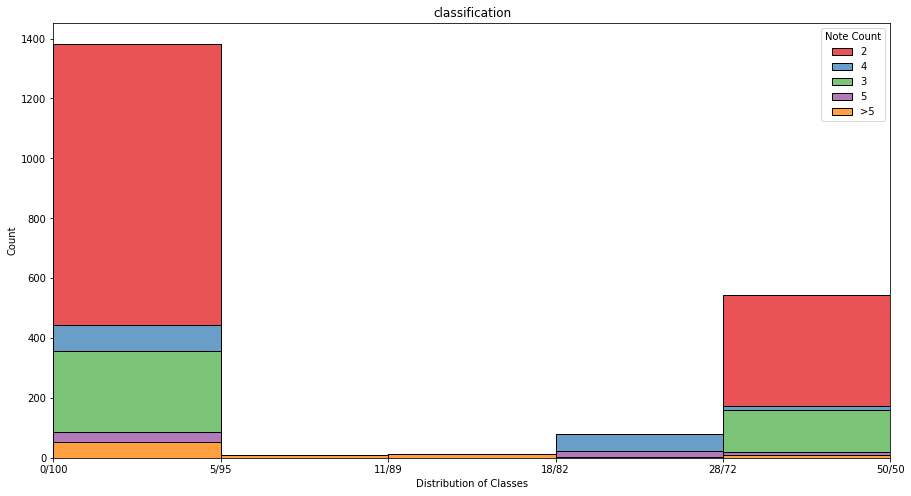

In [21]:
def set_hue(x):
    if x ==2: return '2'
    if x==3: return '3'
    if x==4: return '4'
    if x==5: return '5'
    if x>5: return '>5'

hues=[set_hue(x) for x in N]

hues=[set_hue(x) for x in N]

var_df=pd.DataFrame({'Variances':all_vars,'Note Count':hues})

bins=[0,0.09,0.16,0.21,0.24,0.25]
bins=[0,0.05,0.1,0.15,0.2,0.25]
fig = plt.figure(figsize=(15,8))
plt.xlim((0,0.25))
ax=sns.histplot(data=var_df, x='Variances', bins=bins,
                hue='Note Count',palette=sns.color_palette("Set1",n_colors=5),multiple='stack')
xticks = bins
xticks_labels=[f'{int(np.round(np.roots([1,-1,xx])[1]*100))}/{int(100-np.round(np.roots([1,-1,xx])[1]*100))}' for xx in xticks ]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels)
plt.xlabel('Distribution of Classes')
plt.title(categorical_column)
plt.show()

# Violin Plot

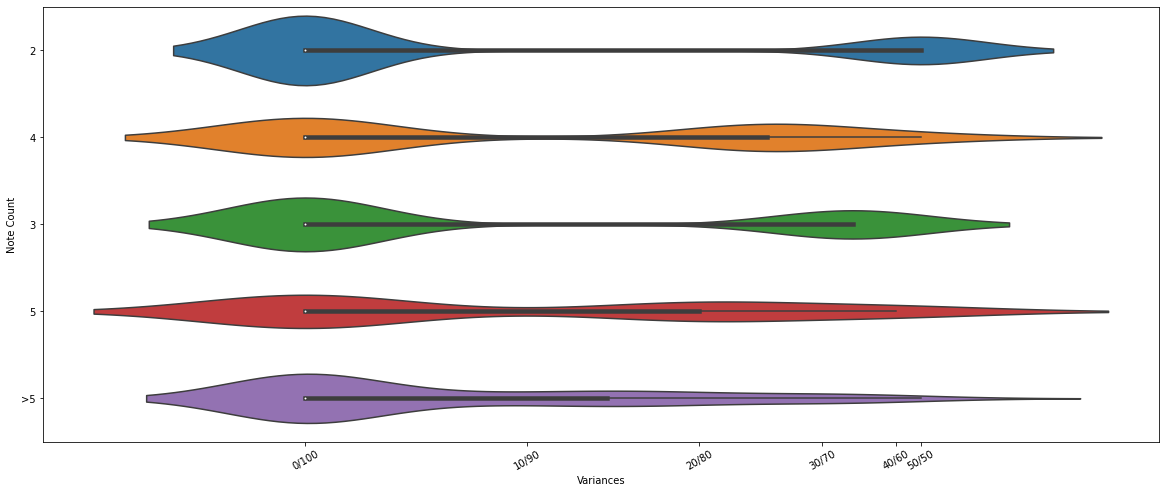

In [24]:
bins=[0,0.09,0.16,0.21,0.24,0.25]

plt.figure(figsize=(20,8))
ax=sns.violinplot(data=var_df, y='Note Count',x='Variances',bins=bins)
xticks = bins
xticks_labels=[f'{int(np.round(np.roots([1,-1,xx])[1]*100))}/{int(100-np.round(np.roots([1,-1,xx])[1]*100))}' for xx in xticks ]
ax.set_xticks(xticks)
ax.set_xticklabels(labels=xticks_labels, rotation=30)
plt.show()

In [26]:

mean = 0.01
std = 0.01
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)


In [27]:
var_df['Adjusted Var']=var_df.Variances.apply(lambda x: x+np.random.normal(mean, std))

In [28]:
var_df2=var_df.sort_values(by='Note Count')

In [29]:
var_df2['Adjusted Var']=var_df2.Variances.apply(lambda x: x+np.random.normal(mean, std))

In [30]:
var_df[var_df.Variances==0.25]['Note Count'].value_counts()

2     372
4      14
>5      1
Name: Note Count, dtype: int64

In [31]:
var_df[var_df['Note Count']=='2']['Variances'].value_counts()

0.00    940
0.25    372
Name: Variances, dtype: int64

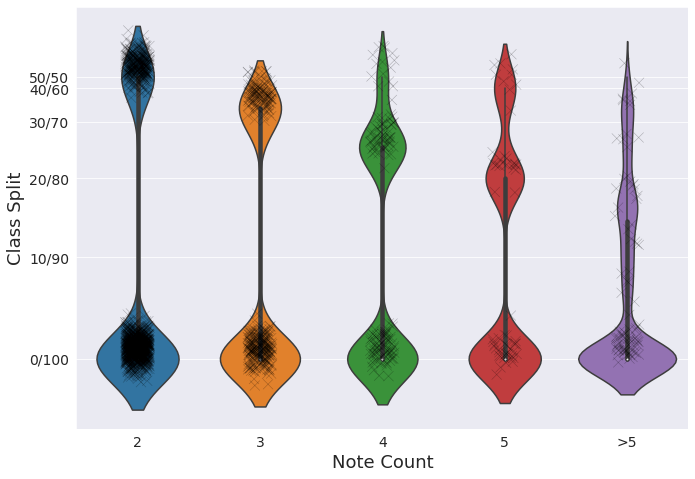

In [32]:
bins=[0,0.09,0.16,0.21,0.24,0.25]
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.rcParams['font.size'] = '14'

ax=sns.violinplot(data=var_df2, x='Note Count',y='Variances',bins=bins,bw=0.2)
yticks = bins
yticks_labels=[f'{int(np.round(np.roots([1,-1,xx])[1]*100))}/{int(100-np.round(np.roots([1,-1,xx])[1]*100))}' for xx in yticks ]
ax.set_yticks(yticks)
ax.set_yticklabels(labels=yticks_labels, rotation=0,fontsize=14)
sns.stripplot(data=var_df2, x='Note Count',y='Adjusted Var', color="black", 
              jitter=True, marker='x', linewidth=0.5,size=10,
             alpha=0.3)
sns.set(font_scale=1.5)
plt.ylabel('Class Split',fontsize=18)
plt.xlabel('Note Count',fontsize=18)

plt.tight_layout()
plt.savefig('ClassSplit.png')

plt.show()